In [1]:
import ipykernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime

In [2]:
misV=[' ',0.00,'N/A',np.nan]


In [3]:
df_2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\Pre.csv')
df_2.tail()


,system:time_start,precipitation
4013,"Dec 27, 2021",0.359
4014,"Dec 28, 2021",0.000
4015,"Dec 29, 2021",0.088
4016,"Dec 30, 2021",4.748
4017,"Dec 31, 2021",2.719


In [4]:
df_1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\pre1.csv')
df_1.tail()

,system:time_start,precipitation
4013,"Dec 27, 2010",0.000
4014,"Dec 28, 2010",0.227
4015,"Dec 29, 2010",1.543
4016,"Dec 30, 2010",6.862
4017,"Dec 31, 2010",0.679


In [5]:
df=df_1.append(df_2)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\658501775.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_1.append(df_2)


In [6]:
df['system:time_start']=df['system:time_start'].apply(lambda x: x.replace(',',''))
df

,system:time_start,precipitation
0,Jan 1 2000,0.000
1,Jan 2 2000,0.000
2,Jan 3 2000,0.000
3,Jan 4 2000,0.002
4,Jan 5 2000,0.002
...,...,...
4013,Dec 27 2021,0.359
4014,Dec 28 2021,0.000
4015,Dec 29 2021,0.088
4016,Dec 30 2021,4.748


In [7]:
df[["month","day", "year"]] = df["system:time_start"].str.split(" ", expand = True)
df['date']=df["month"]+ ' ' +df["year"]
df

,system:time_start,precipitation,month,day,year,date
0,Jan 1 2000,0.000,Jan,1,2000,Jan 2000
1,Jan 2 2000,0.000,Jan,2,2000,Jan 2000
2,Jan 3 2000,0.000,Jan,3,2000,Jan 2000
3,Jan 4 2000,0.002,Jan,4,2000,Jan 2000
4,Jan 5 2000,0.002,Jan,5,2000,Jan 2000
...,...,...,...,...,...,...
4013,Dec 27 2021,0.359,Dec,27,2021,Dec 2021
4014,Dec 28 2021,0.000,Dec,28,2021,Dec 2021
4015,Dec 29 2021,0.088,Dec,29,2021,Dec 2021
4016,Dec 30 2021,4.748,Dec,30,2021,Dec 2021


In [8]:
l1=[]
month=1
year=0
days=0
data=0
for i in df['precipitation']:
    days+=1
    data+=i
    if month in [1,3,5,7,8,10,12] and days==31:
        l1.append(data)
        days=data=0
        if month==12:
            month=1
            year+=1
        else:
            month+=1
    elif month in [4,6,9,11] and days==30:
        l1.append(data)
        days=data=0
        month+=1
    elif month==2 and days==29 and year in [0,4,8,16,20]: 
        l1.append(data)
        days=data=0
        month+=1
    elif month==2 and days==28 and year in [1,2,3,5,6,7,9,10,11,12,13,14,15,17,18,19,21]: 
        l1.append(data)
        days=data=0
        month+=1
Prep_monthly=l1

In [9]:
len(Prep_monthly)

264

In [10]:
Prep_monthly.pop(0)
len(Prep_monthly)

263

In [11]:
df_t1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\temp1.csv',na_values=misV)
df_t1


,system:time_start,LST_Day_1km
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",13.998
3,"Feb 27, 2000",23.792
4,"Feb 28, 2000",14.532
...,...,...
3910,"Dec 27, 2010",10.572
3911,"Dec 28, 2010",10.894
3912,"Dec 29, 2010",4.241
3913,"Dec 30, 2010",9.203


In [12]:
df_t2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\Temp.csv',na_values=misV)
df_t2

,system:time_start,LST_Day_1km
0,"Jan 1, 2011",3.461
1,"Jan 2, 2011",8.798
2,"Jan 3, 2011",6.161
3,"Jan 4, 2011",6.909
4,"Jan 5, 2011",7.051
...,...,...
4004,"Dec 27, 2021",7.610
4005,"Dec 28, 2021",-0.120
4006,"Dec 29, 2021",5.923
4007,"Dec 30, 2021",-0.480


In [13]:
df1=df_t1.append(df_t2)
df1.isnull()

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\3478089583.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df_t1.append(df_t2)


,system:time_start,LST_Day_1km
0,False,True
1,False,True
2,False,False
3,False,False
4,False,False
...,...,...
4004,False,False
4005,False,False
4006,False,False
4007,False,False


In [14]:
df1=df1.fillna(method='bfill')
df1.count().isnull()

system:time_start    False
LST_Day_1km          False
dtype: bool

In [15]:
df1['system:time_start']=df1['system:time_start'].apply(lambda x: x.replace(',',''))
df1

,system:time_start,LST_Day_1km
0,Feb 24 2000,13.998
1,Feb 25 2000,13.998
2,Feb 26 2000,13.998
3,Feb 27 2000,23.792
4,Feb 28 2000,14.532
...,...,...
4004,Dec 27 2021,7.610
4005,Dec 28 2021,-0.120
4006,Dec 29 2021,5.923
4007,Dec 30 2021,-0.480


In [16]:
df1[["month","day", "year"]] = df1["system:time_start"].str.split(" ", expand = True)
df1['date']=df1["month"]+ ' ' +df1["year"]
df1

,system:time_start,LST_Day_1km,month,day,year,date
0,Feb 24 2000,13.998,Feb,24,2000,Feb 2000
1,Feb 25 2000,13.998,Feb,25,2000,Feb 2000
2,Feb 26 2000,13.998,Feb,26,2000,Feb 2000
3,Feb 27 2000,23.792,Feb,27,2000,Feb 2000
4,Feb 28 2000,14.532,Feb,28,2000,Feb 2000
...,...,...,...,...,...,...
4004,Dec 27 2021,7.610,Dec,27,2021,Dec 2021
4005,Dec 28 2021,-0.120,Dec,28,2021,Dec 2021
4006,Dec 29 2021,5.923,Dec,29,2021,Dec 2021
4007,Dec 30 2021,-0.480,Dec,30,2021,Dec 2021


In [17]:
Temp_monthly =  df1.groupby('date',as_index=False)['LST_Day_1km'].mean()
Temp_monthly

,date,LST_Day_1km
0,Apr 2000,29.873643
1,Apr 2001,27.727900
2,Apr 2002,26.902793
3,Apr 2003,26.218200
4,Apr 2004,28.113400
...,...,...
258,Sep 2017,28.892767
259,Sep 2018,28.356367
260,Sep 2019,27.642067
261,Sep 2020,29.424433


In [18]:
df_s1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\ndsi1.csv',na_values=misV)
df_s1=df_s1.fillna(method='ffill')
df_s1.tail(10)

,system:time_start,NDSI
3907,"Dec 22, 2010",-0.271
3908,"Dec 23, 2010",-0.209
3909,"Dec 24, 2010",-0.279
3910,"Dec 25, 2010",-0.225
3911,"Dec 26, 2010",-0.301
3912,"Dec 27, 2010",-0.196
3913,"Dec 28, 2010",-0.067
3914,"Dec 29, 2010",0.333
3915,"Dec 30, 2010",0.270
3916,"Dec 31, 2010",-0.020


In [19]:
df_s2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\Ndsi.csv',na_values=misV)
df_s2=df_s2.fillna(method='ffill')
df_s2.tail(10)

,system:time_start,NDSI
3998,"Dec 22, 2021",-0.037
3999,"Dec 23, 2021",-0.036
4000,"Dec 24, 2021",-0.141
4001,"Dec 25, 2021",0.027
4002,"Dec 26, 2021",0.196
4003,"Dec 27, 2021",0.053
4004,"Dec 28, 2021",-0.061
4005,"Dec 29, 2021",-0.116
4006,"Dec 30, 2021",-0.018
4007,"Dec 31, 2021",-0.069


In [20]:
df2=df_s1.append(df_s2)
df2.head(145)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\218998936.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df_s1.append(df_s2)


,system:time_start,NDSI
0,"Feb 24, 2000",NaN
1,"Feb 25, 2000",NaN
2,"Feb 26, 2000",0.013
3,"Feb 27, 2000",0.121
4,"Feb 28, 2000",0.050
...,...,...
140,"Jul 13, 2000",-0.168
141,"Jul 14, 2000",-0.081
142,"Jul 15, 2000",-0.131
143,"Jul 16, 2000",-0.104


In [21]:

df2['system:time_start']=df2['system:time_start'].apply(lambda x: x.replace(',',''))
df2

,system:time_start,NDSI
0,Feb 24 2000,NaN
1,Feb 25 2000,NaN
2,Feb 26 2000,0.013
3,Feb 27 2000,0.121
4,Feb 28 2000,0.050
...,...,...
4003,Dec 27 2021,0.053
4004,Dec 28 2021,-0.061
4005,Dec 29 2021,-0.116
4006,Dec 30 2021,-0.018


In [22]:
df2[["month","day", "year"]] = df2["system:time_start"].str.split(" ", expand = True)
df2['date']=df2["month"]+ ' ' +df2["year"]
df2

,system:time_start,NDSI,month,day,year,date
0,Feb 24 2000,NaN,Feb,24,2000,Feb 2000
1,Feb 25 2000,NaN,Feb,25,2000,Feb 2000
2,Feb 26 2000,0.013,Feb,26,2000,Feb 2000
3,Feb 27 2000,0.121,Feb,27,2000,Feb 2000
4,Feb 28 2000,0.050,Feb,28,2000,Feb 2000
...,...,...,...,...,...,...
4003,Dec 27 2021,0.053,Dec,27,2021,Dec 2021
4004,Dec 28 2021,-0.061,Dec,28,2021,Dec 2021
4005,Dec 29 2021,-0.116,Dec,29,2021,Dec 2021
4006,Dec 30 2021,-0.018,Dec,30,2021,Dec 2021


In [23]:
Ndsi_monthly =  df2.groupby('date',as_index=False)['NDSI'].mean()
Ndsi_monthly 

,date,NDSI
0,Apr 2000,-0.013967
1,Apr 2001,-0.017900
2,Apr 2002,-0.003379
3,Apr 2003,0.021300
4,Apr 2004,0.003967
...,...,...
258,Sep 2017,-0.267133
259,Sep 2018,-0.246600
260,Sep 2019,-0.233400
261,Sep 2020,-0.254800


In [24]:
df_v1 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\veg1.csv',na_values=misV)
df_v1.tail(10)

,system:time_start,NDVI
240,"Jul 28, 2010","3,065.958"
241,"Aug 13, 2010","3,749.67"
242,"Aug 29, 2010","3,730.137"
243,"Sep 14, 2010","3,411.461"
244,"Sep 30, 2010","3,149.426"
245,"Oct 16, 2010","2,803.782"
246,"Nov 1, 2010","2,664.715"
247,"Nov 17, 2010","2,525.295"
248,"Dec 3, 2010","2,397.044"
249,"Dec 19, 2010","2,222.348"


In [25]:
df_v1.dtypes

system:time_start    object
NDVI                 object
dtype: object

In [26]:
df_v1['NDVI']=df_v1['NDVI'].str.replace(',','')
df_v1['NDVI'] = df_v1['NDVI'].astype(float)
df_v1.dtypes


system:time_start     object
NDVI                 float64
dtype: object

In [27]:
df_v2 = pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\Veg.csv',na_values=misV)
df_v2.tail(10)

,system:time_start,NDVI
243,"Jul 28, 2021","3,707.311"
244,"Aug 13, 2021","3,662.492"
245,"Aug 29, 2021","3,568.348"
246,"Sep 14, 2021","3,444.704"
247,"Sep 30, 2021","3,148.584"
248,"Oct 16, 2021","2,701.696"
249,"Nov 1, 2021","2,462.705"
250,"Nov 17, 2021","2,379.361"
251,"Dec 3, 2021","2,243.921"
252,"Dec 19, 2021","2,091.491"


In [28]:
df_v2.dtypes

system:time_start    object
NDVI                 object
dtype: object

In [29]:
df_v2['NDVI']=df_v2['NDVI'].str.replace(',','')
df_v2['NDVI'] = df_v2['NDVI'].astype(float)
df_v2.dtypes


system:time_start     object
NDVI                 float64
dtype: object

In [30]:
df3=df_v1.append(df_v2)


C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\1710664389.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3=df_v1.append(df_v2)


In [31]:
df3=df3.fillna(method='ffill')
df3.count().isnull()

system:time_start    False
NDVI                 False
dtype: bool

In [32]:
df3['system:time_start']=df3['system:time_start'].apply(lambda x: x.replace(',',''))
df3

,system:time_start,NDVI
0,Feb 18 2000,1864.482
1,Mar 5 2000,1950.279
2,Mar 21 2000,2002.192
3,Apr 6 2000,2043.985
4,Apr 22 2000,2039.470
...,...,...
248,Oct 16 2021,2701.696
249,Nov 1 2021,2462.705
250,Nov 17 2021,2379.361
251,Dec 3 2021,2243.921


In [33]:
df3[["month","day", "year"]] = df3["system:time_start"].str.split(" ", expand = True)
df3['date']=df3["month"]+' '+df3["year"]
df3

,system:time_start,NDVI,month,day,year,date
0,Feb 18 2000,1864.482,Feb,18,2000,Feb 2000
1,Mar 5 2000,1950.279,Mar,5,2000,Mar 2000
2,Mar 21 2000,2002.192,Mar,21,2000,Mar 2000
3,Apr 6 2000,2043.985,Apr,6,2000,Apr 2000
4,Apr 22 2000,2039.470,Apr,22,2000,Apr 2000
...,...,...,...,...,...,...
248,Oct 16 2021,2701.696,Oct,16,2021,Oct 2021
249,Nov 1 2021,2462.705,Nov,1,2021,Nov 2021
250,Nov 17 2021,2379.361,Nov,17,2021,Nov 2021
251,Dec 3 2021,2243.921,Dec,3,2021,Dec 2021


In [34]:
Ndvi_monthly =  df3.groupby('date',as_index=False)['NDVI'].mean()
Ndvi_monthly.tail(50) 

,date,NDVI
213,Nov 2016,2330.9510
214,Nov 2017,2242.7655
215,Nov 2018,2301.3300
216,Nov 2019,2552.8830
217,Nov 2020,2256.1060
218,Nov 2021,2421.0330
219,Oct 2000,2233.5665
220,Oct 2001,2138.3270
221,Oct 2002,2387.2310
222,Oct 2003,2421.4550


In [35]:
flood=pd.read_csv(r'C:\Users\wwwkh\Desktop\FYP-Project\Datasets\Kpk\Flood.csv')
f=flood[['Months','Years','Flood']]
f


,Months,Years,Flood
0,Janruary,2000,NaN
1,February,2000,NaN
2,March,2000,NaN
3,April,2000,NaN
4,May,2000,NaN
...,...,...,...
259,August,2021,NaN
260,September,2021,NaN
261,October,2021,NaN
262,November,2021,NaN


In [36]:
f['N-Month']=f['Months']
f

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\1737262551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['N-Month']=f['Months']


,Months,Years,Flood,N-Month
0,Janruary,2000,NaN,Janruary
1,February,2000,NaN,February
2,March,2000,NaN,March
3,April,2000,NaN,April
4,May,2000,NaN,May
...,...,...,...,...
259,August,2021,NaN,August
260,September,2021,NaN,September
261,October,2021,NaN,October
262,November,2021,NaN,November


In [37]:
j=0
month=1
for i in f['N-Month']:
   if month>=13:
      month=1
   if month<=12:
      f['N-Month'][j]=month
      j=j+1
      month=month+1  

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\1617226002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['N-Month'][j]=month


In [38]:
f['Flood'] = f['Flood'].map({'Yes':'True',np.nan:'False'})

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\2728431229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['Flood'] = f['Flood'].map({'Yes':'True',np.nan:'False'})


In [39]:
f.tail(45)

,Months,Years,Flood,N-Month
219,April,2018,False,4
220,May,2018,False,5
221,June,2018,False,6
222,July,2018,False,7
223,August,2018,False,8
224,September,2018,False,9
225,October,2018,False,10
226,November,2018,False,11
227,December,2018,False,12
228,Janruary,2019,False,1


In [40]:
f['Flood'] = f['Flood'].map({'True':True,'False':False})

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\432263796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['Flood'] = f['Flood'].map({'True':True,'False':False})


In [41]:
f.tail()

,Months,Years,Flood,N-Month
259,August,2021,False,8
260,September,2021,False,9
261,October,2021,False,10
262,November,2021,False,11
263,December,2021,False,12


In [42]:
f['Years'].dtype

dtype('int64')

In [43]:
f['Years']=f['Years'].astype(str)

C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\2156774572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['Years']=f['Years'].astype(str)


In [44]:
f['date']=f['Months']+' '+f['Years']


C:\Users\wwwkh\AppData\Local\Temp\ipykernel_17460\1482693199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['date']=f['Months']+' '+f['Years']


In [45]:
f

,Months,Years,Flood,N-Month,date
0,Janruary,2000,False,1,Janruary 2000
1,February,2000,False,2,February 2000
2,March,2000,False,3,March 2000
3,April,2000,False,4,April 2000
4,May,2000,False,5,May 2000
...,...,...,...,...,...
259,August,2021,False,8,August 2021
260,September,2021,False,9,September 2021
261,October,2021,False,10,October 2021
262,November,2021,False,11,November 2021


In [46]:
f=f.drop(f.index[0],axis=0)

In [47]:
f=f.reset_index()
f

,index,Months,Years,Flood,N-Month,date
0,1,February,2000,False,2,February 2000
1,2,March,2000,False,3,March 2000
2,3,April,2000,False,4,April 2000
3,4,May,2000,False,5,May 2000
4,5,June,2000,False,6,June 2000
...,...,...,...,...,...,...
258,259,August,2021,False,8,August 2021
259,260,September,2021,False,9,September 2021
260,261,October,2021,False,10,October 2021
261,262,November,2021,False,11,November 2021


In [48]:
Flood_monthly =  f.sort_values(["date"], ascending=True)
Flood_monthly.head()

,index,Months,Years,Flood,N-Month,date
2,3,April,2000,False,4,April 2000
14,15,April,2001,False,4,April 2001
26,27,April,2002,False,4,April 2002
38,39,April,2003,False,4,April 2003
50,51,April,2004,False,4,April 2004


In [49]:
Flood_monthly=Flood_monthly.reset_index()

In [50]:

dfx = pd.DataFrame({'Month':Flood_monthly['N-Month'],
                    'Year':Flood_monthly['Years'],
                    'Temp': Temp_monthly['LST_Day_1km'],
                    'Ice':  Ndsi_monthly['NDSI'],
                    'veg': Ndvi_monthly['NDVI'],
                    'Flood':Flood_monthly['Flood']})
dfx.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='Kpk.csv')  
dfx.to_csv('Kpk.zip', index=False,
          compression=compression_opts)
dfx

,Month,Year,Temp,Ice,veg,Flood
0,4,2000,29.873643,-0.013967,2041.7275,False
1,4,2001,27.727900,-0.017900,1942.6465,False
2,4,2002,26.902793,-0.003379,2079.2695,False
3,4,2003,26.218200,0.021300,2217.3235,False
4,4,2004,28.113400,0.003967,2140.4820,False
...,...,...,...,...,...,...
258,9,2017,28.892767,-0.267133,2977.0160,False
259,9,2018,28.356367,-0.246600,2967.1410,False
260,9,2019,27.642067,-0.233400,3327.8370,False
261,9,2020,29.424433,-0.254800,3462.2790,False


In [51]:
dfx=dfx.set_index(Flood_monthly['index'])

In [52]:
dfx.head()

,Month,Year,Temp,Ice,veg,Flood
index,,,,,,
3,4,2000,29.873643,-0.013967,2041.7275,False
15,4,2001,27.727900,-0.017900,1942.6465,False
27,4,2002,26.902793,-0.003379,2079.2695,False
39,4,2003,26.218200,0.021300,2217.3235,False
51,4,2004,28.113400,0.003967,2140.4820,False


In [53]:
dfx=dfx.sort_index()

In [54]:
dfx

,Month,Year,Temp,Ice,veg,Flood
index,,,,,,
1,2,2000,17.041333,0.033750,1864.4820,False
2,3,2000,18.878581,0.087226,1976.2355,False
3,4,2000,29.873643,-0.013967,2041.7275,False
4,5,2000,33.941710,-0.092097,2053.4755,False
5,6,2000,32.489467,-0.123967,2312.7570,False
...,...,...,...,...,...,...
259,8,2021,28.501613,-0.231871,3615.4200,False
260,9,2021,27.572100,-0.253233,3296.6440,False
261,10,2021,25.023613,-0.207129,2701.6960,False


In [55]:
dfx.reset_index()

,index,Month,Year,Temp,Ice,veg,Flood
0,1,2,2000,17.041333,0.033750,1864.4820,False
1,2,3,2000,18.878581,0.087226,1976.2355,False
2,3,4,2000,29.873643,-0.013967,2041.7275,False
3,4,5,2000,33.941710,-0.092097,2053.4755,False
4,5,6,2000,32.489467,-0.123967,2312.7570,False
...,...,...,...,...,...,...,...
258,259,8,2021,28.501613,-0.231871,3615.4200,False
259,260,9,2021,27.572100,-0.253233,3296.6440,False
260,261,10,2021,25.023613,-0.207129,2701.6960,False
261,262,11,2021,16.967900,-0.202367,2421.0330,False


In [56]:
dfx=dfx.drop(dfx.index[0],axis=0)

In [57]:

len(dfx)

262

In [58]:
Prep_monthly.pop(0)

19.742

In [59]:
dfx[['Month','Year']]=dfx[['Month','Year']].astype(int)

In [60]:
dfx[['Month','Year']].dtypes


Month    int32
Year     int32
dtype: object

In [61]:
dfx['Rain(mm)']=Prep_monthly
dff=dfx

In [62]:
dff.to_csv(index=True)

compression_opts = dict(method='zip',
                        archive_name='Kpk.csv')  
dff.to_csv('Kpk.zip', index=False,
          compression=compression_opts)
dff

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
index,,,,,,,
2,3,2000,18.878581,0.087226,1976.2355,False,52.778
3,4,2000,29.873643,-0.013967,2041.7275,False,26.190
4,5,2000,33.941710,-0.092097,2053.4755,False,28.605
5,6,2000,32.489467,-0.123967,2312.7570,False,37.777
6,7,2000,29.904161,-0.088226,2815.6000,False,71.727
...,...,...,...,...,...,...,...
259,8,2021,28.501613,-0.231871,3615.4200,False,67.992
260,9,2021,27.572100,-0.253233,3296.6440,False,57.125
261,10,2021,25.023613,-0.207129,2701.6960,False,29.567


In [63]:
corr=dff.corr()

<AxesSubplot:>

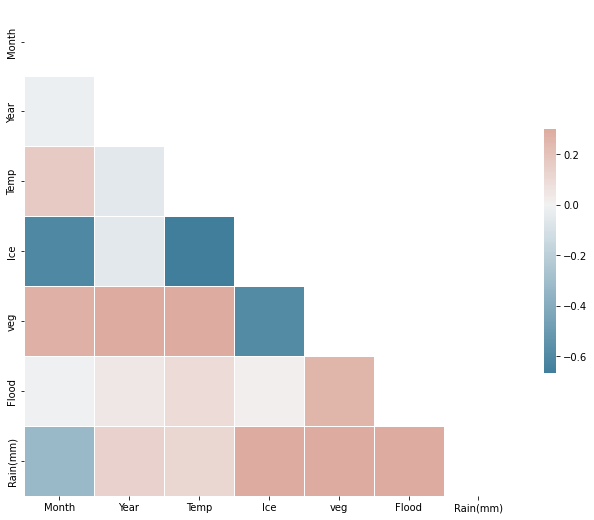

In [64]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
dfx.count().isnull()

Month       False
Year        False
Temp        False
Ice         False
veg         False
Flood       False
Rain(mm)    False
dtype: bool

c:\Users\wwwkh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


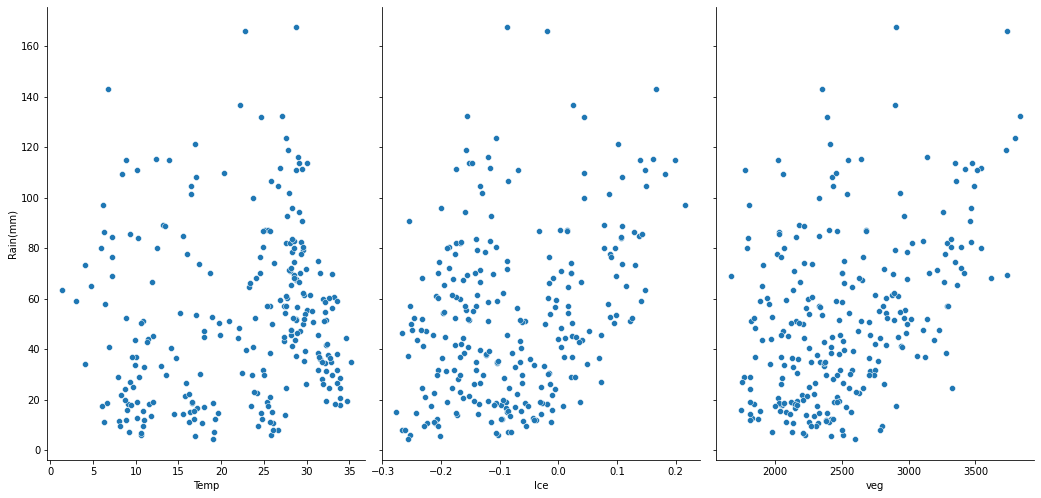

In [66]:
sns.pairplot(dff, x_vars=['Temp','Ice','veg'], y_vars='Rain(mm)', size=7, aspect=0.7)

c:\Users\wwwkh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


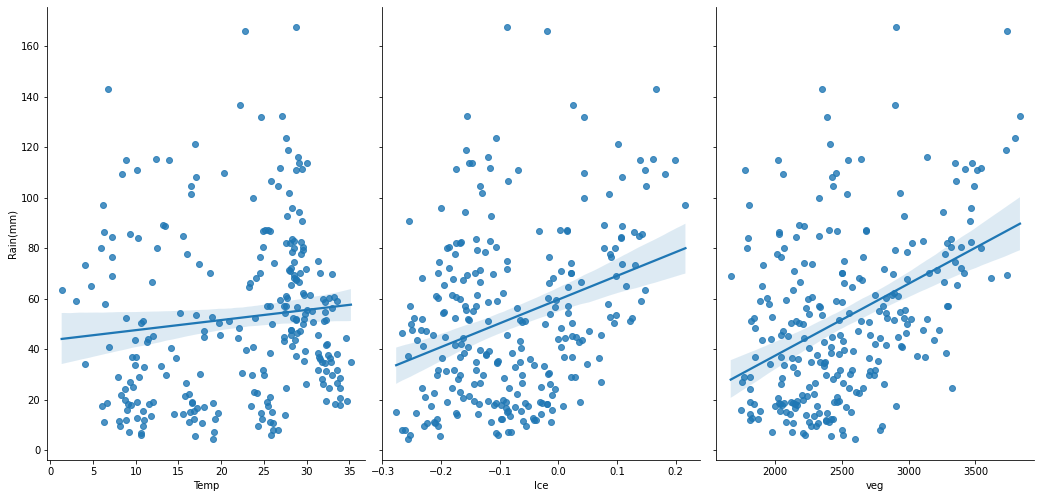

In [67]:
sns.pairplot(dff, x_vars=['Temp','Ice','veg'], y_vars='Rain(mm)', size=7, aspect=0.7, kind='reg')
       

In [68]:
dff.head(24)

,Month,Year,Temp,Ice,veg,Flood,Rain(mm)
index,,,,,,,
2,3,2000,18.878581,0.087226,1976.2355,False,52.778
3,4,2000,29.873643,-0.013967,2041.7275,False,26.190
4,5,2000,33.941710,-0.092097,2053.4755,False,28.605
5,6,2000,32.489467,-0.123967,2312.7570,False,37.777
6,7,2000,29.904161,-0.088226,2815.6000,False,71.727
7,8,2000,30.005474,-0.157158,2973.1365,False,55.290
8,9,2000,28.799667,-0.163433,2649.6870,False,67.432
9,10,2000,27.466677,-0.172516,2233.5665,False,13.817
10,11,2000,19.213333,-0.085733,1974.2290,False,7.262


In [69]:
dff['Month'].dtype

dtype('int32')